In [ ]:
!pip install lifelines # Installs the 'lifelines' package for survival analysis in Python.
# 'lifelines' provides tools for survival analysis, including Kaplan-Meier estimators, Cox Proportional-Hazards models,
# and cumulative hazard estimators, which are useful for modeling time-to-event data in various fields (e.g., medicine, engineering).

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=16637816f602748bdabfac6ae88497784037f0e77730435a786f4395d6c93cf8
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
!pip install pingouin # Installs the 'pingouin' package for statistical analysis in Python.
# 'pingouin' is designed for easy and robust statistical testing, providing functions for t-tests, ANOVA, correlation,
# effect sizes, and post-hoc tests, among others. It’s particularly useful for data analysis, hypothesis testing,
# and exploratory data analysis in fields like psychology, biology, and social sciences.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.4 MB/s eta 0:00:00


#Importing Necessary Libraries

In [ ]:
# Importing core libraries for data manipulation, statistical analysis, and visualization

import numpy as np # Numerical operations on arrays and matrices
import pandas as pd # Data manipulation and analysis, especially data frames
import datetime as dt # Working with date and time objects

# Importing visualization libraries

import matplotlib.pyplot as plt # Basic plotting functions
import seaborn as sns  # Advanced statistical data visualization (built on Matplotlib)

# Importing statistical analysis libraries

import scipy.stats as stats # Statistical tests and probability functions
import pingouin as pg # Statistical analysis for more advanced techniques
import statsmodels.formula.api as smf # Statistical models using formulas, especially regression models

# Importing survival analysis models from lifelines

from lifelines import KaplanMeierFitter, NelsonAalenFitter, CoxPHFitter
# KaplanMeierFitter: Non-parametric survival estimator
# NelsonAalenFitter: Non-parametric cumulative hazard estimator
# CoxPHFitter: Cox Proportional-Hazards model for regression on survival data

# Importing data preprocessing modules from sklearn

from sklearn.impute import SimpleImputer# Handles missing values by imputing with mean, median, or most frequent values
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder
# StandardScaler: Scales data to mean 0 and variance 1
# MinMaxScaler: Scales data to a specified range, often [0, 1]
# PowerTransformer: Applies power transformations to make data more Gaussian-like
# LabelEncoder: Encodes categorical labels as integers for machine learning

# Importing model selection and evaluation tools from sklearn

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
# train_test_split: Splits data into training and testing sets
# KFold: Cross-validation method for splitting data into k folds
# cross_val_score: Cross-validation scoring to evaluate model performance
# GridSearchCV: Hyperparameter tuning with grid search using cross-validation

# Importing regression models from sklearn

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
# LinearRegression: Simple linear regression model for predicting continuous values
# LogisticRegression: Logistic regression for binary classification
# Lasso: Linear regression with L1 regularization (feature selection)
# Ridge: Linear regression with L2 regularization (reduces collinearity)

# Importing classification models from sklearn

from sklearn.neighbors import KNeighborsClassifier   # K-Nearest Neighbors classifier for classification
from sklearn.svm import SVC # Support Vector Classifier (SVM) for binary classification
from sklearn.tree import DecisionTreeClassifier # Decision tree classifier based on feature splits
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# VotingClassifier: Combines predictions of multiple models by voting
# BaggingClassifier: Reduces variance using bagging on multiple instances of a base estimator
# RandomForestClassifier: Bagging-based ensemble of decision trees, adds randomness to improve generalization
# AdaBoostClassifier: Boosting ensemble that improves model by focusing on errors in previous rounds
# GradientBoostingClassifier: Boosting ensemble that reduces prediction error through gradient descent

# Importing evaluation metrics from sklearn

from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, roc_curve, roc_auc_score
# mean_squared_error: Measures average squared difference for regression predictions
# accuracy_score: Calculates accuracy as a fraction of correct predictions
# classification_report: Detailed report including precision, recall, and F1-score for classification
# roc_curve: Computes points for the ROC curve, helpful for binary classifiers
# roc_auc_score: Computes AUC score for ROC curve, evaluates classifier performance

In [ ]:
breast = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/breast cancer project/Breast Cancer METABRIC.csv')
# Reads a CSV file and loads it into a DataFrame named 'breast'

In [ ]:
breast.head() # Displays the first five rows of the DataFrame 'breast' by default

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


# Data Cleaning

In [ ]:
breast.info() # Provides a concise summary of the DataFrame 'breast
breast.isna().sum() # Checks for missing values in each column of the DataFrame 'breast'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

,0
Patient ID,0
Age at Diagnosis,11
Type of Breast Surgery,554
Cancer Type,0
Cancer Type Detailed,0
Cellularity,592
Chemotherapy,529
Pam50 + Claudin-low subtype,529
Cohort,11
ER status measured by IHC,83


In [ ]:
breast['Cancer Type Detailed'].value_counts() # Counts occurrences of each unique value in the 'Cancer Type Detailed' column
# 'value_counts()' returns a Series with unique values in the column as the index and their frequencies as values.
# This is useful for understanding the distribution of categories within 'Cancer Type Detailed',
# allowing you to identify the prevalence of each cancer type in the dataset.

,count
Cancer Type Detailed,
Breast Invasive Ductal Carcinoma,1865
Breast Mixed Ductal and Lobular Carcinoma,269
Breast Invasive Lobular Carcinoma,192
Invasive Breast Carcinoma,133
Breast Invasive Mixed Mucinous Carcinoma,25
Breast,21
Breast Angiosarcoma,2
Metaplastic Breast Cancer,2


In [ ]:
IDC = breast[breast['Cancer Type Detailed'] == 'Breast Invasive Ductal Carcinoma']
# Filters the 'breast' DataFrame to include only rows where 'Cancer Type Detailed' is 'Breast Invasive Ductal Carcinoma'
# Creates a new DataFrame called 'IDC' that contains only records of Invasive Ductal Carcinoma cases.
# Useful for isolating a specific subset of data for focused analysis on this particular cancer type.

IDC.head() # Displays the first five rows of the 'IDC' DataFrame to verify the filter

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
5,MB-0010,78.77,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,Deceased,Positive,Yes,2.89,Recurred,Female,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
6,MB-0014,56.45,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.17,Not Recurred,Female,NaN,10.0,2.0,Living


In [ ]:
IDC.info() # Provides a concise summary of the filtered DataFrame 'IDC'
IDC.isna().sum() # Checks for missing values in each column of the filtered DataFrame 'IDC'

<class 'pandas.core.frame.DataFrame'>
Index: 1865 entries, 0 to 2501
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      1865 non-null   object 
 1   Age at Diagnosis                1865 non-null   float64
 2   Type of Breast Surgery          1518 non-null   object 
 3   Cancer Type                     1865 non-null   object 
 4   Cancer Type Detailed            1865 non-null   object 
 5   Cellularity                     1495 non-null   object 
 6   Chemotherapy                    1537 non-null   object 
 7   Pam50 + Claudin-low subtype     1537 non-null   object 
 8   Cohort                          1865 non-null   float64
 9   ER status measured by IHC       1830 non-null   object 
 10  ER Status                       1854 non-null   object 
 11  Neoplasm Histologic Grade       1808 non-null   float64
 12  HER2 status measured by SNP6    1537 no

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,347
Cancer Type,0
Cancer Type Detailed,0
Cellularity,370
Chemotherapy,328
Pam50 + Claudin-low subtype,328
Cohort,0
ER status measured by IHC,35


In [ ]:
IDC = IDC.dropna(subset = ['Type of Breast Surgery', 'Chemotherapy'])
# Drops rows from the 'IDC' DataFrame that have missing values in the specified columns: 'Type of Breast Surgery' and 'Chemotherapy'
# This ensures that the analysis focuses only on cases where both surgery and chemotherapy information is available,
# which is critical for any analysis involving these treatment modalities.

IDC = IDC.iloc[:, [1, 2, 6, 10, 11, 13, 15, 19, 23, 24, 25, 29, 31, 32, 33]]
# Selects specific columns from the 'IDC' DataFrame using integer-based indexing with 'iloc'
# Only the columns at the specified indices will be retained in the 'IDC' DataFrame.
# This is useful for narrowing down the dataset to only the most relevant features for further analysis,
# reducing complexity and focusing on essential data.

#Exploratory Data Analysis (EDA)

In [ ]:
IDC = IDC.dropna() # Drops any rows in the 'IDC' DataFrame that contain missing values in any column.

IDC = IDC[IDC['Sex'] == 'Female']
# Filters the 'IDC' DataFrame to include only rows where the 'Sex' column is 'Female'.
# This isolates the dataset to focus on female patients only, which is crucial for studies that are specific to gender.

IDC = IDC.drop('Overall Survival Status', axis = 1)
# Drops the 'Overall Survival Status' column from the 'IDC' DataFrame.
# The 'axis=1' parameter indicates that a column (rather than a row) is being dropped.

In [ ]:
print('Age at diagnosis :{} - {} year'.format(IDC['Age at Diagnosis'].min(), IDC['Age at Diagnosis'].max()))
# Prints the minimum and maximum values of the 'Age at Diagnosis' column in the 'IDC' DataFrame.
# 'min()' retrieves the smallest age, while 'max()' retrieves the largest age at diagnosis among the patients.
# The 'format()' method is used to insert these values into the string, providing a clear summary of the age range at diagnosis.

IDC.groupby('Type of Breast Surgery')['Chemotherapy'].value_counts()
# Groups the 'IDC' DataFrame by the 'Type of Breast Surgery' column.
# For each type of surgery, it counts the occurrences of each value in the 'Chemotherapy' column.
# This provides a contingency table showing how many patients received chemotherapy based on the type of breast surgery they underwent.
# This analysis helps to understand the relationship between surgical treatment and chemotherapy administration.

Age at diagnosis :26.36 - 96.29 year


Type of Breast Surgery  Chemotherapy
Breast Conserving       No              366
                        Yes              89
Mastectomy              No              420
                        Yes             177
Name: count, dtype: int64

In [ ]:
IDC[['ER Status', 'HER2 Status', 'PR Status']].value_counts()
# Counts the occurrences of each unique combination of values in the 'ER Status', 'HER2 Status', and 'PR Status' columns of the 'IDC' DataFrame.
# This creates a Series where the index is the unique combinations of these statuses and the values are their respective counts.
# This is useful for understanding the distribution of different receptor statuses (Estrogen Receptor, HER2, Progesterone Receptor)
# among the patients, which can be important for determining treatment options and prognostic implications in breast cancer.

ER Status  HER2 Status  PR Status
Positive   Negative     Positive     476
                        Negative     226
Negative   Negative     Negative     187
           Positive     Negative      83
Positive   Positive     Negative      38
                        Positive      31
Negative   Negative     Positive       8
           Positive     Positive       3
Name: count, dtype: int64

In [ ]:
advanced = IDC[IDC['Tumor Stage'].isin([2, 3])]
# Filters the 'IDC' DataFrame to create a new DataFrame called 'advanced'.
# This new DataFrame includes only the rows where the 'Tumor Stage' is either 2 or 3, indicating more advanced stages of breast cancer.
# The 'isin()' function checks if the values in 'Tumor Stage' are within the specified list [2, 3].

advanced = advanced[advanced['Age at Diagnosis'] < 60]
# Further filters the 'advanced' DataFrame to include only those rows where the 'Age at Diagnosis' is less than 60.
# This narrows down the dataset to focus on younger patients (under 60) with advanced tumor stages.
# This subset can be particularly relevant for analyzing outcomes, treatment responses, or specific patient demographics.

advanced


,Age at Diagnosis,Type of Breast Surgery,Chemotherapy,ER Status,Neoplasm Histologic Grade,HER2 Status,Hormone Therapy,Lymph nodes examined positive,Overall Survival (Months),PR Status,Sex,Tumor Size,Tumor Stage,Patient's Vital Status
2,48.87,Mastectomy,Yes,Positive,2.0,Negative,Yes,1.0,163.700000,Positive,Female,15.0,2.0,Died of Disease
6,56.45,Breast Conserving,Yes,Positive,2.0,Negative,Yes,1.0,164.333333,Positive,Female,10.0,2.0,Living
14,45.27,Mastectomy,Yes,Negative,3.0,Negative,No,3.0,164.900000,Positive,Female,19.0,2.0,Living
16,51.46,Breast Conserving,Yes,Positive,2.0,Positive,Yes,1.0,103.833333,Positive,Female,25.0,2.0,Living
22,45.43,Breast Conserving,Yes,Positive,3.0,Negative,Yes,0.0,140.866667,Positive,Female,23.0,2.0,Living
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,39.41,Mastectomy,Yes,Positive,2.0,Positive,No,2.0,124.566667,Negative,Female,20.0,2.0,Died of Disease
1682,56.93,Breast Conserving,No,Positive,2.0,Negative,Yes,2.0,221.200000,Negative,Female,20.0,2.0,Living
1688,49.67,Mastectomy,No,Positive,3.0,Negative,No,0.0,147.766667,Negative,Female,22.0,2.0,Died of Disease
1689,58.83,Breast Conserving,Yes,Negative,3.0,Negative,No,2.0,221.933333,Negative,Female,20.0,2.0,Living


In [ ]:
advanced[['Type of Breast Surgery', 'Chemotherapy']].value_counts()
# Counts occurrences of each unique combination of 'Type of Breast Surgery' and 'Chemotherapy' in the 'advanced' DataFrame.
# This shows how often each type of surgery is paired with chemotherapy among advanced-stage patients under 60.

,,count
Type of Breast Surgery,Chemotherapy,
Mastectomy,Yes,135
Breast Conserving,Yes,69
Mastectomy,No,60
Breast Conserving,No,51


In [ ]:
print('Age at diagnosis') # Prints the label "Age at diagnosis" to indicate the following information is about the age range.
[advanced['Age at Diagnosis'].min(), advanced['Age at Diagnosis'].max()]
# Creates a list containing the minimum and maximum ages at diagnosis in the 'advanced' DataFrame.

Age at diagnosis


[26.72, 59.85]

In [ ]:
methods = []
# Initializes an empty list to store treatment method labels for each row in the 'advanced' DataFrame.
for index, rows in advanced.iterrows() :
      # Iterates over each row in the 'advanced' DataFrame.
      # 'iterrows()' provides an index and the row data (as a Series) for each iteration.

    if rows['Type of Breast Surgery'] == 'Mastectomy' and rows['Chemotherapy'] == 'Yes' :
        methods.append('combined')
      # Appends 'combined' to 'methods' if the patient received both mastectomy and chemotherapy.

    elif rows['Type of Breast Surgery'] == 'Breast Conserving' and rows['Chemotherapy'] == 'Yes' :
        methods.append('only chemotherapy')
      # Appends 'only chemotherapy' if the patient had breast-conserving surgery with chemotherapy.

    elif rows['Type of Breast Surgery'] == 'Mastectomy' and rows['Chemotherapy'] == 'No' :
        methods.append('only surgery')
      # Appends 'only surgery' if the patient had mastectomy without chemotherapy.

    else :
        methods.append('none')
      # Appends 'none' if the patient received neither treatment.
methods = np.array(methods)
# Converts the 'methods' list to a NumPy array for efficient operations and assignment.
advanced['methods'] = methods
# Adds the 'methods' array as a new column in the 'advanced' DataFrame, categorizing treatment methods for each patient.
advanced = advanced[~(advanced['methods'] == 'none')]
# Filters out rows where the 'methods' column has the value 'none', keeping only patients who received at least one treatment.
advanced


,Age at Diagnosis,Type of Breast Surgery,Chemotherapy,ER Status,Neoplasm Histologic Grade,HER2 Status,Hormone Therapy,Lymph nodes examined positive,Overall Survival (Months),PR Status,Sex,Tumor Size,Tumor Stage,Patient's Vital Status,methods
2,48.87,Mastectomy,Yes,Positive,2.0,Negative,Yes,1.0,163.700000,Positive,Female,15.0,2.0,Died of Disease,combined
6,56.45,Breast Conserving,Yes,Positive,2.0,Negative,Yes,1.0,164.333333,Positive,Female,10.0,2.0,Living,only chemotherapy
14,45.27,Mastectomy,Yes,Negative,3.0,Negative,No,3.0,164.900000,Positive,Female,19.0,2.0,Living,combined
16,51.46,Breast Conserving,Yes,Positive,2.0,Positive,Yes,1.0,103.833333,Positive,Female,25.0,2.0,Living,only chemotherapy
22,45.43,Breast Conserving,Yes,Positive,3.0,Negative,Yes,0.0,140.866667,Positive,Female,23.0,2.0,Living,only chemotherapy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,53.45,Breast Conserving,Yes,Negative,2.0,Positive,No,2.0,10.066667,Negative,Female,30.0,3.0,Died of Disease,only chemotherapy
1633,39.41,Mastectomy,Yes,Positive,2.0,Positive,No,2.0,124.566667,Negative,Female,20.0,2.0,Died of Disease,combined
1688,49.67,Mastectomy,No,Positive,3.0,Negative,No,0.0,147.766667,Negative,Female,22.0,2.0,Died of Disease,only surgery
1689,58.83,Breast Conserving,Yes,Negative,3.0,Negative,No,2.0,221.933333,Negative,Female,20.0,2.0,Living,only chemotherapy


In [ ]:
advanced.info()  # Check structure and data types of the DataFrame
advanced.isna().sum()  # Check for missing values in each column

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 2 to 1707
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age at Diagnosis               264 non-null    float64
 1   Type of Breast Surgery         264 non-null    object 
 2   Chemotherapy                   264 non-null    object 
 3   ER Status                      264 non-null    object 
 4   Neoplasm Histologic Grade      264 non-null    float64
 5   HER2 Status                    264 non-null    object 
 6   Hormone Therapy                264 non-null    object 
 7   Lymph nodes examined positive  264 non-null    float64
 8   Overall Survival (Months)      264 non-null    float64
 9   PR Status                      264 non-null    object 
 10  Sex                            264 non-null    object 
 11  Tumor Size                     264 non-null    float64
 12  Tumor Stage                    264 non-null    float64

,0
Age at Diagnosis,0
Type of Breast Surgery,0
Chemotherapy,0
ER Status,0
Neoplasm Histologic Grade,0
HER2 Status,0
Hormone Therapy,0
Lymph nodes examined positive,0
Overall Survival (Months),0
PR Status,0


In [ ]:
advanced.describe() # Generates descriptive statistics of the DataFrame 'advanced'

,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Overall Survival (Months),Tumor Size,Tumor Stage
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,47.188636,2.719697,3.075758,115.202525,30.153409,2.132576
std,8.064267,0.520520,4.769391,80.704488,16.030038,0.339760
min,26.720000,1.000000,0.000000,6.266667,1.000000,2.000000
25%,41.055000,3.000000,1.000000,43.133333,20.000000,2.000000
50%,48.235000,3.000000,2.000000,100.100000,26.500000,2.000000
75%,53.727500,3.000000,3.000000,176.000000,35.000000,2.000000
max,59.840000,3.000000,41.000000,337.033333,130.000000,3.000000


In [ ]:
advanced["Patient's Vital Status"].value_counts()
# Count the number of occurrences of each unique value in the "Patient's Vital Status" column

,count
Patient's Vital Status,
Living,135
Died of Disease,119
Died of Other Causes,10


In [ ]:
advanced.loc[advanced["Patient's Vital Status"] == 'Died of Other Causes', "Patient's Vital Status"] = 'Living'
# Modifying the 'Patient's Vital Status' column in the 'advanced' DataFrame
# For patients whose vital status is 'Died of Other Causes', update it to 'Living'

In [ ]:
advanced.loc[advanced["Patient's Vital Status"] == 'Died of Disease', "Patient's Vital Status"] = 1
# Update the 'Patient's Vital Status' column based on conditions:
# 1. Replace 'Died of Disease' with 1

advanced.loc[advanced["Patient's Vital Status"] == 'Living', "Patient's Vital Status"] = 0
# 2. Replace 'Living' with 0

advanced["Patient's Vital Status"].value_counts()
# 3. Display the count of unique values in the 'Patient's Vital Status' column

,count
Patient's Vital Status,
0,145
1,119


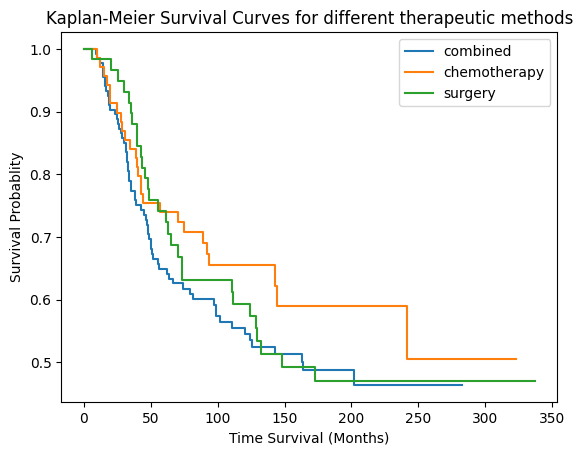

In [ ]:
# Extract 'Overall Survival (Months)' and 'Patient's Vital Status' columns
time = advanced['Overall Survival (Months)']
event = advanced["Patient's Vital Status"]
# Convert time to float and event to integer (for Kaplan-Meier analysis)
time = time.astype(float)
event = event.astype(int)

# Define different therapeutic methods (combined, chemotherapy, surgery)
combined = (advanced['methods'] == 'combined')
chemotherapy = (advanced['methods'] == 'only chemotherapy')
surgery = (advanced['methods'] == 'only surgery')

# Initialize Kaplan-Meier Fitter
km = KaplanMeierFitter()
# Fit and plot Kaplan-Meier survival curve for 'combined' method
km.fit(time[combined], event[combined], label = 'combined')
ax1 = km.plot(ci_show = False)

# Fit and plot Kaplan-Meier survival curve for 'chemotherapy' method
km.fit(time[chemotherapy], event[chemotherapy], label = 'chemotherapy')
km.plot(ax = ax1, ci_show = False)

# Fit and plot Kaplan-Meier survival curve for 'surgery' method
km.fit(time[surgery], event[surgery], label = 'surgery')
km.plot(ax = ax1, ci_show = False)

# Customize and display the plot
plt.title('Kaplan-Meier Survival Curves for different therapeutic methods')
plt.xlabel('Time Survival (Months)')
plt.ylabel('Survival Probablity')
plt.show()


In [ ]:
# Drop specified columns from the 'advanced' DataFrame and create a new DataFrame 'df'
df = advanced.drop(['Type of Breast Surgery', 'Chemotherapy', 'ER Status', 'HER2 Status', 'Hormone Therapy', 'PR Status', 'Sex'], axis = 1)
df

,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Overall Survival (Months),Tumor Size,Tumor Stage,Patient's Vital Status,methods
2,48.87,2.0,1.0,163.700000,15.0,2.0,1,combined
6,56.45,2.0,1.0,164.333333,10.0,2.0,0,only chemotherapy
14,45.27,3.0,3.0,164.900000,19.0,2.0,0,combined
16,51.46,2.0,1.0,103.833333,25.0,2.0,0,only chemotherapy
22,45.43,3.0,0.0,140.866667,23.0,2.0,0,only chemotherapy
...,...,...,...,...,...,...,...,...
1627,53.45,2.0,2.0,10.066667,30.0,3.0,1,only chemotherapy
1633,39.41,2.0,2.0,124.566667,20.0,2.0,1,combined
1688,49.67,3.0,0.0,147.766667,22.0,2.0,1,only surgery
1689,58.83,3.0,2.0,221.933333,20.0,2.0,0,only chemotherapy


In [ ]:
# Generate dummy variables for the categorical columns 'Tumor Stage' and 'methods' in the 'df' DataFrame
dummies = pd.get_dummies(df[['Tumor Stage', 'methods']]).astype(int)
# Select only the second and third columns from the generated dummy variables
dummies = dummies.iloc[:, [1, 2]]

dummies


,methods_combined,methods_only chemotherapy
2,1,0
6,0,1
14,1,0
16,0,1
22,0,1
...,...,...
1627,0,1
1633,1,0
1688,0,0
1689,0,1


In [ ]:
# Concatenate the original DataFrame 'df' with the dummy variables DataFrame 'dummies' along columns (axis=1)
df_dummies = pd.concat([df, dummies], axis = 1)
# Drop the original 'Tumor Stage' and 'methods' columns from the 'df_dummies' DataFrame
df_dummies = df_dummies.drop(['Tumor Stage', 'methods'], axis = 1)
df_dummies

,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Overall Survival (Months),Tumor Size,Patient's Vital Status,methods_combined,methods_only chemotherapy
2,48.87,2.0,1.0,163.700000,15.0,1,1,0
6,56.45,2.0,1.0,164.333333,10.0,0,0,1
14,45.27,3.0,3.0,164.900000,19.0,0,1,0
16,51.46,2.0,1.0,103.833333,25.0,0,0,1
22,45.43,3.0,0.0,140.866667,23.0,0,0,1
...,...,...,...,...,...,...,...,...
1627,53.45,2.0,2.0,10.066667,30.0,1,0,1
1633,39.41,2.0,2.0,124.566667,20.0,1,1,0
1688,49.67,3.0,0.0,147.766667,22.0,1,0,0
1689,58.83,3.0,2.0,221.933333,20.0,0,0,1


The adjusted log(Hazard ratio) for each independent variable
Coefficient is log(Hazard Ratio) and Exponential of Coefficient is Hazard Ratio.


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
Age at Diagnosis,-0.017216,0.982931,0.011844,-0.040430,0.005998,0.960376,1.006016,0.0,-1.453576,0.146064,2.775330
Neoplasm Histologic Grade,0.312745,1.367173,0.207101,-0.093165,0.718655,0.911043,2.051673,0.0,1.510111,0.131015,2.932196
Lymph nodes examined positive,0.073712,1.076497,0.016389,0.041590,0.105834,1.042467,1.111637,0.0,4.497618,0.000007,17.150859
Tumor Size,0.005538,1.005554,0.005217,-0.004687,0.015764,0.995324,1.015889,0.0,1.061570,0.288431,1.793701
methods_combined,-0.293440,0.745694,0.239940,-0.763714,0.176834,0.465933,1.193433,0.0,-1.222973,0.221340,2.175663
methods_only chemotherapy,-0.388177,0.678292,0.280776,-0.938489,0.162135,0.391219,1.176019,0.0,-1.382512,0.166814,2.583684


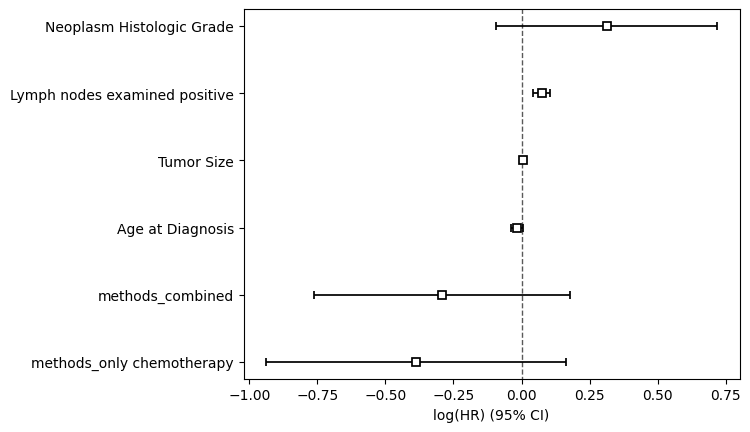

In [ ]:
# Convert 'Overall Survival (Months)' column to float type in the 'df_dummies' DataFrame
df_dummies['Overall Survival (Months)'] = df_dummies['Overall Survival (Months)'].astype(float)
# Convert 'Patient's Vital Status' column to integer type in the 'df_dummies' DataFrame
df_dummies["Patient's Vital Status"] = df_dummies["Patient's Vital Status"].astype(int)

# Initialize the Cox Proportional Hazards model
cox = CoxPHFitter()
# Fit the Cox model to the data using 'Overall Survival (Months)' as the time column and 'Patient's Vital Status' as the event column
cox.fit(df_dummies, 'Overall Survival (Months)', event_col = "Patient's Vital Status")
# Print a description of the Cox model's coefficients and their interpretation
print('The adjusted log(Hazard ratio) for each independent variable')
print('Coefficient is log(Hazard Ratio) and Exponential of Coefficient is Hazard Ratio.')
# Plot the Cox model results
cox.plot()
# Display the summary of the Cox model, which includes the coefficients, p-values, and other statistics
cox.summary


#10 Years Survival Prediction Model for Breast Cancer¶


In [ ]:
# Select specific columns from the 'breast' DataFrame by their index positions (1, 2, 4, 6, 11, 19, 23, 31, 32, 33)
breast = breast.iloc[:, [1, 2, 4, 6, 11, 19, 23, 31, 32, 33]]
# Drop rows where the 'Chemotherapy' column has missing values (NaN)
breast = breast.dropna(subset = 'Chemotherapy')
breast

,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Chemotherapy,Neoplasm Histologic Grade,Lymph nodes examined positive,Overall Survival (Months),Tumor Size,Tumor Stage,Patient's Vital Status
0,75.65,Mastectomy,Breast Invasive Ductal Carcinoma,No,3.0,10.0,140.500000,22.0,2.0,Living
1,43.19,Breast Conserving,Breast Invasive Ductal Carcinoma,No,3.0,0.0,84.633333,10.0,1.0,Living
2,48.87,Mastectomy,Breast Invasive Ductal Carcinoma,Yes,2.0,1.0,163.700000,15.0,2.0,Died of Disease
3,47.68,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,Yes,2.0,3.0,164.933333,25.0,2.0,Living
4,76.97,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,Yes,3.0,8.0,41.366667,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...
1980,43.10,Breast Conserving,Breast Invasive Lobular Carcinoma,No,3.0,1.0,196.866667,25.0,NaN,Living
1981,42.88,Mastectomy,Breast Invasive Ductal Carcinoma,No,3.0,1.0,44.733333,20.0,NaN,Died of Disease
1982,62.90,Mastectomy,Breast Invasive Ductal Carcinoma,No,3.0,45.0,175.966667,25.0,NaN,Died of Disease
1983,61.16,Mastectomy,Breast Invasive Ductal Carcinoma,No,2.0,12.0,86.233333,25.0,NaN,Died of Other Causes


#Data Preparation¶


In [ ]:
# Drop all rows in the 'breast' DataFrame that contain any missing (NaN) values
breast = breast.dropna()
# Filter the 'breast' DataFrame to keep only rows where the 'Patient's Vital Status' is either 'Living' or 'Died of Disease'
breast = breast[breast["Patient's Vital Status"].isin(['Living', 'Died of Disease'])]
breast


,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Chemotherapy,Neoplasm Histologic Grade,Lymph nodes examined positive,Overall Survival (Months),Tumor Size,Tumor Stage,Patient's Vital Status
0,75.65,Mastectomy,Breast Invasive Ductal Carcinoma,No,3.0,10.0,140.500000,22.0,2.0,Living
1,43.19,Breast Conserving,Breast Invasive Ductal Carcinoma,No,3.0,0.0,84.633333,10.0,1.0,Living
2,48.87,Mastectomy,Breast Invasive Ductal Carcinoma,Yes,2.0,1.0,163.700000,15.0,2.0,Died of Disease
3,47.68,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,Yes,2.0,3.0,164.933333,25.0,2.0,Living
4,76.97,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,Yes,3.0,8.0,41.366667,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...
1694,75.33,Mastectomy,Breast Invasive Ductal Carcinoma,No,1.0,0.0,0.100000,15.0,1.0,Died of Disease
1698,70.65,Breast Conserving,Breast Mixed Ductal and Lobular Carcinoma,No,1.0,0.0,201.166667,20.0,1.0,Living
1702,52.84,Breast Conserving,Breast Mixed Ductal and Lobular Carcinoma,Yes,2.0,6.0,200.333333,20.0,2.0,Living
1707,48.59,Mastectomy,Breast Invasive Ductal Carcinoma,Yes,3.0,1.0,14.700000,30.0,2.0,Died of Disease


In [ ]:
# Filter the 'breast' DataFrame to keep only rows where the patient is 'Living'
# and the 'Overall Survival (Months)' is greater than or equal to 120 months
living = breast[(breast["Patient's Vital Status"] == 'Living') & (breast['Overall Survival (Months)'] >= 120)]


In [ ]:
# Filter the 'breast' DataFrame to keep only rows where the patient has 'Died of Disease'
# and the 'Overall Survival (Months)' is less than 120 months
died = breast[(breast["Patient's Vital Status"] == 'Died of Disease') & (breast['Overall Survival (Months)'] < 120)]


In [ ]:
# Concatenate the 'living' and 'died' DataFrames along rows (axis=0)
tenyears = pd.concat([living, died])
tenyears


,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Chemotherapy,Neoplasm Histologic Grade,Lymph nodes examined positive,Overall Survival (Months),Tumor Size,Tumor Stage,Patient's Vital Status
0,75.65,Mastectomy,Breast Invasive Ductal Carcinoma,No,3.0,10.0,140.500000,22.0,2.0,Living
3,47.68,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,Yes,2.0,3.0,164.933333,25.0,2.0,Living
6,56.45,Breast Conserving,Breast Invasive Ductal Carcinoma,Yes,2.0,1.0,164.333333,10.0,2.0,Living
13,70.91,Breast Conserving,Breast Invasive Ductal Carcinoma,No,1.0,0.0,163.533333,21.0,1.0,Living
14,45.27,Mastectomy,Breast Invasive Ductal Carcinoma,Yes,3.0,3.0,164.900000,19.0,2.0,Living
...,...,...,...,...,...,...,...,...,...,...
1643,85.85,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,No,3.0,4.0,25.633333,37.0,2.0,Died of Disease
1675,44.51,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,Yes,2.0,9.0,52.466667,25.0,2.0,Died of Disease
1690,66.94,Mastectomy,Breast Invasive Ductal Carcinoma,Yes,3.0,31.0,35.466667,10.0,2.0,Died of Disease
1694,75.33,Mastectomy,Breast Invasive Ductal Carcinoma,No,1.0,0.0,0.100000,15.0,1.0,Died of Disease


In [ ]:
# Count the number of occurrences of each unique value in the 'Cancer Type Detailed' column of the 'tenyears' DataFrame
tenyears['Cancer Type Detailed'].value_counts()


,count
Cancer Type Detailed,
Breast Invasive Ductal Carcinoma,631
Breast Mixed Ductal and Lobular Carcinoma,77
Breast Invasive Lobular Carcinoma,53
Breast Invasive Mixed Mucinous Carcinoma,7
Breast,3
Invasive Breast Carcinoma,2


In [ ]:
# Replace all occurrences of 'Breast' in the 'Cancer Type Detailed' column with 'Unspecified' for patients with 'Breast' cancer type
tenyears.loc[tenyears['Cancer Type Detailed'] == 'Breast', 'Cancer Type Detailed'] = 'Unspecified'
# Remove the string 'Breast ' from the beginning of the values in the 'Cancer Type Detailed' column
tenyears['Cancer Type Detailed'] = tenyears['Cancer Type Detailed'].str.replace('Breast ', '')
# Count the number of occurrences of each unique value in the 'Cancer Type Detailed' column
tenyears['Cancer Type Detailed'].value_counts()


,count
Cancer Type Detailed,
Invasive Ductal Carcinoma,631
Mixed Ductal and Lobular Carcinoma,77
Invasive Lobular Carcinoma,53
Invasive Mixed Mucinous Carcinoma,7
Unspecified,3
Invasive Carcinoma,2


In [ ]:
# Filter the 'tenyears' DataFrame to exclude rows where the 'Cancer Type Detailed' is 'Unspecified',
# 'Invasive Carcinoma', or 'Invasive Mixed Mucinous Carcinoma'
tenyears = tenyears[(tenyears['Cancer Type Detailed'] != 'Unspecified') & (tenyears['Cancer Type Detailed'] != 'Invasive Carcinoma') & (tenyears['Cancer Type Detailed'] != 'Invasive Mixed Mucinous Carcinoma')]


#Exploratory Data Analysis : For feature selection¶


In [ ]:
# Set the style of seaborn plots to 'darkgrid'
sns.set_style('darkgrid')


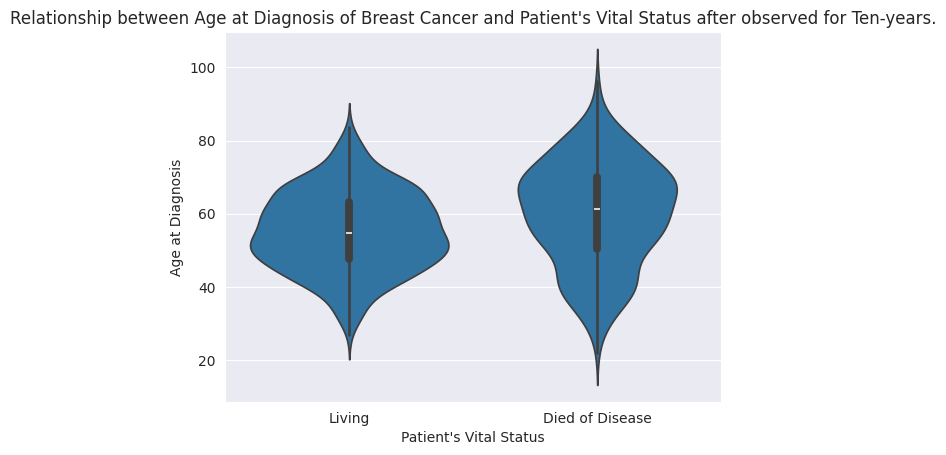

Mean age at diagnosis of living patients : 55.277288557213936
Mean age at diagnosis of dead patients : 59.990640668523675


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.105651,666.25364,two-sided,4.307282e-07,"[-6.53, -2.9]",0.376333,2.4e+04,0.99935


In [ ]:
# Create a violin plot showing the distribution of 'Age at Diagnosis' for patients categorized by their 'Patient's Vital Status'
sns.violinplot(data = tenyears, x = "Patient's Vital Status", y = 'Age at Diagnosis')
# Set the title of the plot
plt.title("Relationship between Age at Diagnosis of Breast Cancer and Patient's Vital Status after observed for Ten-years.")
# Display the plot
plt.show()

# Extract the 'Age at Diagnosis' of patients who are 'Living'
age_living = tenyears[tenyears["Patient's Vital Status"] == 'Living']['Age at Diagnosis']
# Extract the 'Age at Diagnosis' of patients who 'Died of Disease'
age_died = tenyears[tenyears["Patient's Vital Status"] == 'Died of Disease']['Age at Diagnosis']

# Print the mean age at diagnosis for living patients
print('Mean age at diagnosis of living patients :', age_living.mean())
# Print the mean age at diagnosis for patients who died of disease
print('Mean age at diagnosis of dead patients :', age_died.mean())

# Perform an independent t-test to compare the mean age at diagnosis between living and deceased patients
pg.ttest(x = age_living, y = age_died, paired = False, alternative = 'two-sided')


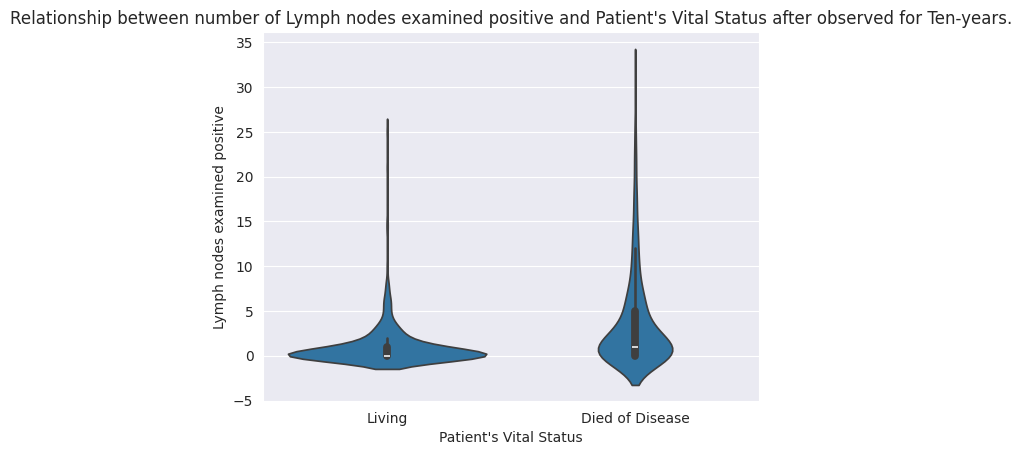

Number of lymphnode examined positive of living patients : 0.0
Number of lymphnode examined positive of dead patients : 1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.530129,490.622129,two-sided,1.828379e-16,"[-3.19, -2.0]",0.642651,5.97e+13,1.0


In [ ]:
# Create a violin plot showing the distribution of 'Lymph nodes examined positive' for patients categorized by their 'Patient's Vital Status'
sns.violinplot(data = tenyears, x = "Patient's Vital Status", y = 'Lymph nodes examined positive')
# Set the title of the plot
plt.title("Relationship between number of Lymph nodes examined positive and Patient's Vital Status after observed for Ten-years.")
# Display the plot
plt.show()
# Extract the number of positive lymph nodes for living patients
lymphnode_living = tenyears[tenyears["Patient's Vital Status"] == 'Living']['Lymph nodes examined positive']
# Extract the number of positive lymph nodes for patients who 'Died of Disease'
lymphnode_died = tenyears[tenyears["Patient's Vital Status"] == 'Died of Disease']['Lymph nodes examined positive']

# Print the median number of positive lymph nodes for living patients
print('Number of lymphnode examined positive of living patients :', lymphnode_living.median())
# Print the median number of positive lymph nodes for deceased patients
print('Number of lymphnode examined positive of dead patients :', lymphnode_died.median())

# Perform an independent t-test to compare the number of positive lymph nodes between living and deceased patients
pg.ttest(x = lymphnode_living, y = lymphnode_died, paired = False, alternative = 'two-sided')


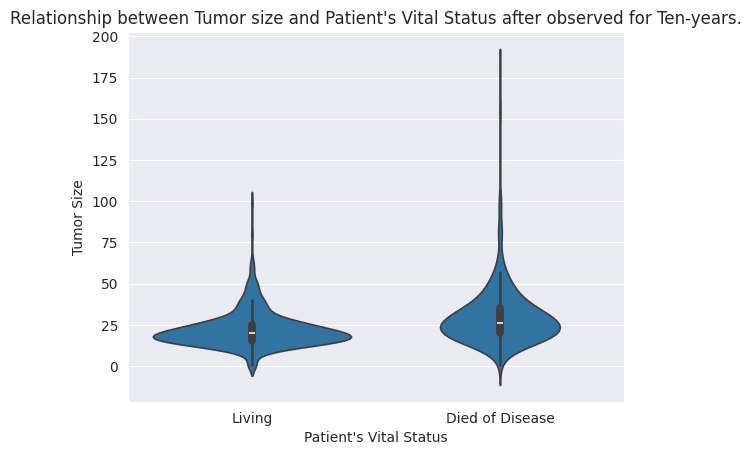

Tumor size of living patients : 20.0
Tumor size of dead patients : 26.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-7.260842,543.807818,two-sided,1.338134e-12,"[-10.99, -6.31]",0.543372,6.384e+09,1.0


In [ ]:
# Create a violin plot showing the distribution of 'Tumor Size' for patients categorized by their 'Patient's Vital Status'
sns.violinplot(data = tenyears, x = "Patient's Vital Status", y = 'Tumor Size')
# Set the title of the plot
plt.title("Relationship between Tumor size and Patient's Vital Status after observed for Ten-years.")
# Display the plot
plt.show()

# Extract the 'Tumor Size' for living patients
size_living = tenyears[tenyears["Patient's Vital Status"] == 'Living']['Tumor Size']
# Extract the 'Tumor Size' for patients who 'Died of Disease'
size_died = tenyears[tenyears["Patient's Vital Status"] == 'Died of Disease']['Tumor Size']

# Print the median tumor size for living patients
print('Tumor size of living patients :', size_living.median())
# Print the median tumor size for deceased patients
print('Tumor size of dead patients :', size_died.median())

# Perform an independent t-test to compare the tumor size between living and deceased patients
pg.ttest(x = size_living, y = size_died, paired = False, alternative = 'two-sided')


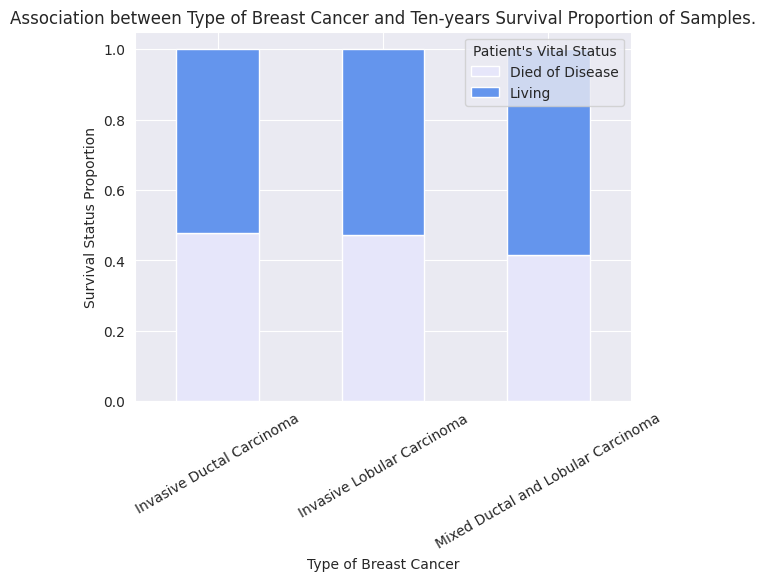

Patient's Vital Status              Died of Disease    Living
Cancer Type Detailed                                         
Invasive Ductal Carcinoma                  0.478605  0.521395
Invasive Lobular Carcinoma                 0.471698  0.528302
Mixed Ductal and Lobular Carcinoma         0.415584  0.584416


,0
test,pearson
lambda,1.0
chi2,1.09372
dof,2.0
pval,0.578764
cramer,0.037911
power,0.141102


In [ ]:
# Group the data by 'Cancer Type Detailed' and calculate the normalized value counts of 'Patient's Vital Status' (Survival Status)
# This gives the proportion of living, dead, and other statuses for each cancer type
cancer_survive = tenyears.groupby('Cancer Type Detailed')["Patient's Vital Status"].value_counts(normalize = True)
# Reshape the resulting Series into a DataFrame where each column represents a unique survival status
cancer_survive = cancer_survive.unstack()
# Plot the survival proportions for each cancer type using a stacked bar chart
# The bars will represent the survival proportions with different colors for each status
cancer_survive.plot(kind = 'bar', stacked = True, color = ['lavender', 'cornflowerblue', 'navy'])
# Set the x-axis label for the plot (Type of Breast Cancer)
plt.xlabel('Type of Breast Cancer')
# Set the y-axis label for the plot (Survival Status Proportion)
plt.ylabel('Survival Status Proportion')
# Rotate the x-axis labels by 30 degrees for better readability
plt.xticks(rotation = 30)
# Set the title of the plot
plt.title('Association between Type of Breast Cancer and Ten-years Survival Proportion of Samples.')
# Display the plot
plt.show()

# Perform a chi-square test of independence between 'Cancer Type Detailed' and 'Patient's Vital Status'
# This test checks if the survival status is independent of the cancer type
expected, observed, stats = pg.chi2_independence(data = tenyears, x = 'Cancer Type Detailed', y = "Patient's Vital Status")
# Print the survival proportions for each cancer type and survival status
print(cancer_survive)
# Print the results of the chi-square test (first row of the stats DataFrame)
stats.iloc[0]


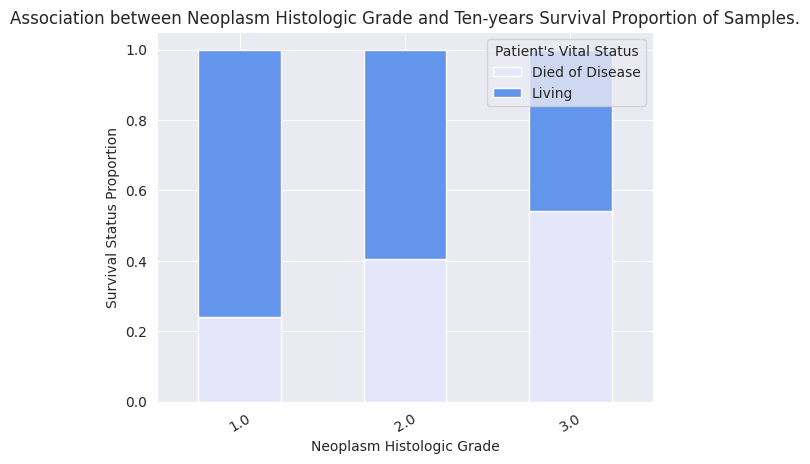

Patient's Vital Status     Died of Disease    Living
Neoplasm Histologic Grade                           
1.0                               0.240741  0.759259
2.0                               0.404494  0.595506
3.0                               0.540909  0.459091


,0
test,pearson
lambda,1.0
chi2,24.855205
dof,2.0
pval,0.000004
cramer,0.180724
power,0.99632


In [ ]:
# Group the data by 'Neoplasm Histologic Grade' and calculate the normalized value counts of 'Patient's Vital Status' (Survival Status)
# This gives the proportion of living, dead, and other statuses for each histologic grade of the neoplasm
histo_survive = tenyears.groupby('Neoplasm Histologic Grade')["Patient's Vital Status"].value_counts(normalize = True)
# Reshape the resulting Series into a DataFrame where each column represents a unique survival status
histo_survive = histo_survive.unstack()
# Plot the survival proportions for each histologic grade using a stacked bar chart
# The bars will represent the survival proportions with different colors for each status
histo_survive.plot(kind = 'bar', stacked = True, color = ['lavender', 'cornflowerblue', 'navy'])
# Set the x-axis label for the plot (Neoplasm Histologic Grade)
plt.xlabel('Neoplasm Histologic Grade')
# Set the y-axis label for the plot (Survival Status Proportion)
plt.ylabel('Survival Status Proportion')
# Rotate the x-axis labels by 30 degrees for better readability
plt.xticks(rotation = 30)
# Set the title of the plot
plt.title('Association between Neoplasm Histologic Grade and Ten-years Survival Proportion of Samples.')
# Display the plot
plt.show()

# Perform a chi-square test of independence between 'Neoplasm Histologic Grade' and 'Patient's Vital Status'
# This test checks if the survival status is independent of the histologic grade of the neoplasm
expected, observed, stats = pg.chi2_independence(data = tenyears, x = 'Neoplasm Histologic Grade', y = "Patient's Vital Status")

# Print the survival proportions for each histologic grade and survival status
print(histo_survive)
# Print the results of the chi-square test (first row of the stats DataFrame)
stats.iloc[0]


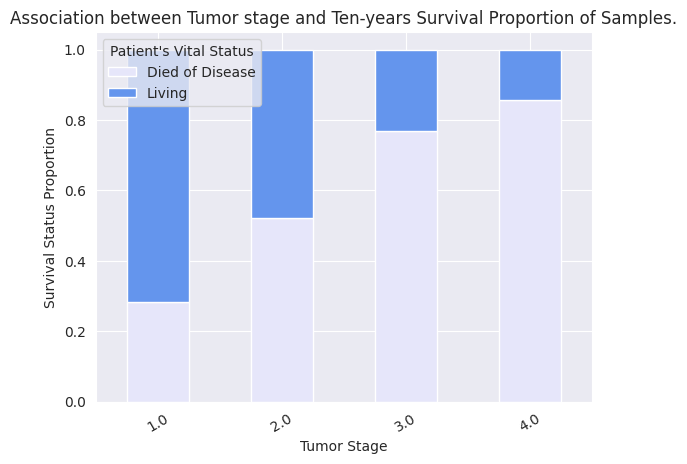

In [ ]:
# Group the data by 'Tumor Stage' and calculate the normalized value counts of 'Patient's Vital Status' (Survival Status)
# This gives the proportion of living, dead, and other statuses for each tumor stage
stage_survive = tenyears.groupby('Tumor Stage')["Patient's Vital Status"].value_counts(normalize = True)
# Reshape the resulting Series into a DataFrame where each column represents a unique survival status
stage_survive = stage_survive.unstack()
# Plot the survival proportions for each tumor stage using a stacked bar chart
# The bars will represent the survival proportions with different colors for each status
stage_survive.plot(kind = 'bar', stacked = True, color = ['lavender', 'cornflowerblue', 'navy'])
# Set the x-axis label for the plot (Tumor Stage)
plt.xlabel('Tumor Stage')
# Set the y-axis label for the plot (Survival Status Proportion)
plt.ylabel('Survival Status Proportion')
# Rotate the x-axis labels by 30 degrees for better readability
plt.xticks(rotation = 30)
# Set the title of the plot
plt.title('Association between Tumor stage and Ten-years Survival Proportion of Samples.')
# Display the plot
plt.show()


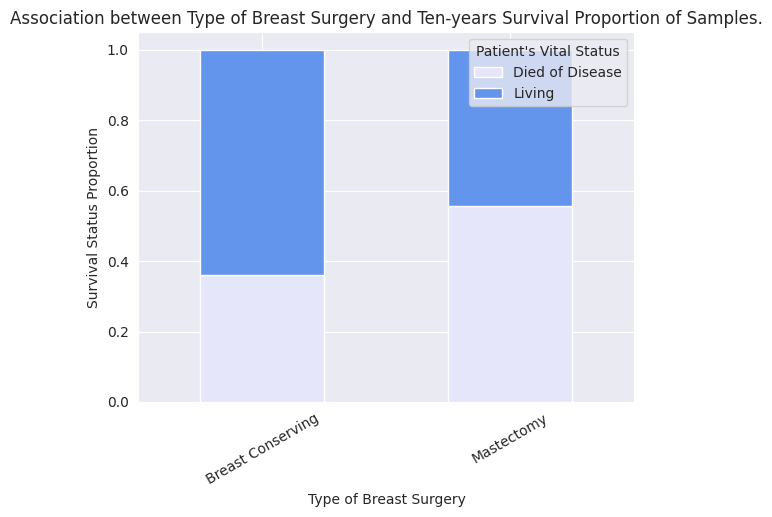

Patient's Vital Status  Died of Disease    Living
Type of Breast Surgery                           
Breast Conserving              0.361446  0.638554
Mastectomy                     0.557110  0.442890


,0
test,pearson
lambda,1.0
chi2,27.973014
dof,1.0
pval,0.0
cramer,0.191724
power,0.999564


In [ ]:
# Grouping data by 'Type of Breast Surgery' and calculating the normalized value counts for "Patient's Vital Status"
surgery_survive = tenyears.groupby('Type of Breast Surgery')["Patient's Vital Status"].value_counts(normalize = True)
# Reshaping the series to a DataFrame format, with each unique "Patient's Vital Status" in its own column
surgery_survive = surgery_survive.unstack()
# Plotting the survival status proportions based on the type of breast surgery
surgery_survive.plot(kind = 'bar', stacked = True, color = ['lavender', 'cornflowerblue', 'navy'])
plt.xlabel('Type of Breast Surgery') # Labeling the x-axis
plt.ylabel('Survival Status Proportion')   # Labeling the y-axis
plt.xticks(rotation = 30)   # Rotating x-axis labels by 30 degrees for readability
plt.title('Association between Type of Breast Surgery and Ten-years Survival Proportion of Samples.')
plt.show() # Display the plot

# Performing a Chi-square test of independence to examine the association between 'Type of Breast Surgery' and "Patient's Vital Status"
expected, observed, stats = pg.chi2_independence(data = tenyears, x = 'Type of Breast Surgery', y = "Patient's Vital Status")

# Printing the DataFrame with survival proportions by surgery type
print(surgery_survive)
# Displaying the first row of the statistical output for key chi-square test results
stats.iloc[0]


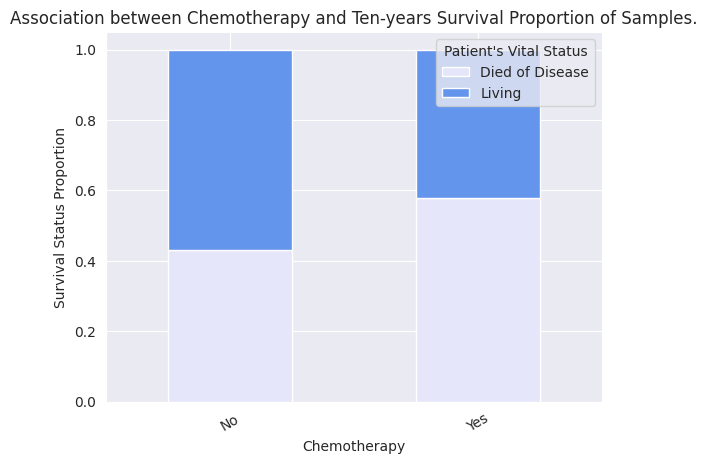

Patient's Vital Status  Died of Disease    Living
Chemotherapy                                     
No                             0.429098  0.570902
Yes                            0.577982  0.422018


,0
test,pearson
lambda,1.0
chi2,13.245205
dof,1.0
pval,0.000273
cramer,0.131928
power,0.953466


In [ ]:
# Grouping the data by 'Chemotherapy' and calculating the normalized value counts for "Patient's Vital Status"
chemo_survive = tenyears.groupby('Chemotherapy')["Patient's Vital Status"].value_counts(normalize = True)
# Reshaping the data to a DataFrame format with each unique "Patient's Vital Status" in its own column
chemo_survive = chemo_survive.unstack()
# Plotting the survival status proportions based on whether or not patients received chemotherapy
chemo_survive.plot(kind = 'bar', stacked = True, color = ['lavender', 'cornflowerblue', 'navy'])
plt.xlabel('Chemotherapy') # Setting the x-axis label to 'Chemotherapy'
plt.ylabel('Survival Status Proportion') # Setting the y-axis label to 'Survival Status Proportion'
plt.xticks(rotation = 30) # Rotating x-axis labels by 30 degrees for readability
plt.title('Association between Chemotherapy and Ten-years Survival Proportion of Samples.')
plt.show()

# Conducting a Chi-square test of independence to assess the association between 'Chemotherapy' and "Patient's Vital Status"
expected, observed, stats = pg.chi2_independence(data = tenyears, x = 'Chemotherapy', y = "Patient's Vital Status")

# Printing the survival proportions DataFrame by chemotherapy status
print(chemo_survive)
# Displaying the first row of the Chi-square test output for essential statistics
stats.iloc[0]


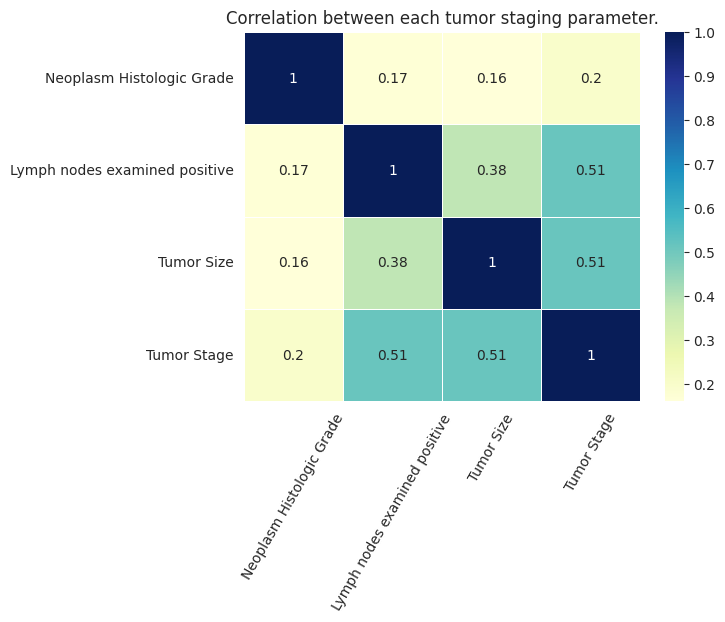

In [ ]:
# Selecting specific columns from the DataFrame related to tumor staging parameters
staging = tenyears.iloc[:, [4, 5, 7, 8]]
# Generating a heatmap to visualize the correlation between each tumor staging parameter
sns.heatmap(staging.corr(), annot = True, cmap = 'YlGnBu', cbar = True, linewidths = .5)
plt.xticks(rotation = 60) # Rotating x-axis labels by 60 degrees for readability
plt.title('Correlation between each tumor staging parameter.')
plt.show() # Display the heatmap


#Pre-processing¶


In [ ]:
# Selecting specific columns from the 'tenyears' DataFrame
tenyears = tenyears.iloc[:, [0, 4, 5, 7, 8, 9]] # Retains only columns at specified indices

# Replacing categorical values in the "Patient's Vital Status" column with numeric values for analysis
tenyears["Patient's Vital Status"] = tenyears["Patient's Vital Status"].replace({'Living':0, 'Died of Disease':1})
# Replacing categorical values in the "Patient's Vital Status" column with numeric values for analysis
tenyears


<ipython-input-47-fbc358f721aa>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tenyears["Patient's Vital Status"] = tenyears["Patient's Vital Status"].replace({'Living':0, 'Died of Disease':1})
<ipython-input-47-fbc358f721aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenyears["Patient's Vital Status"] = tenyears["Patient's Vital Status"].replace({'Living':0, 'Died of Disease':1})


,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Tumor Size,Tumor Stage,Patient's Vital Status
0,75.65,3.0,10.0,22.0,2.0,0
3,47.68,2.0,3.0,25.0,2.0,0
6,56.45,2.0,1.0,10.0,2.0,0
13,70.91,1.0,0.0,21.0,1.0,0
14,45.27,3.0,3.0,19.0,2.0,0
...,...,...,...,...,...,...
1643,85.85,3.0,4.0,37.0,2.0,1
1675,44.51,2.0,9.0,25.0,2.0,1
1690,66.94,3.0,31.0,10.0,2.0,1
1694,75.33,1.0,0.0,15.0,1.0,1


In [ ]:
# Separating features and target variable for model training
X = tenyears.drop("Patient's Vital Status", axis = 1) # Drops the target column, creating a feature set
y = tenyears["Patient's Vital Status"] # Isolates the target variable in a separate series


In [ ]:
# Calculating the variance for each feature in the feature set X
X.var() # Returns the variance of each column in X, giving an idea of the data's spread for each feature


,0
Age at Diagnosis,162.198205
Neoplasm Histologic Grade,0.392382
Lymph nodes examined positive,17.924023
Tumor Size,271.773931
Tumor Stage,0.425258


In [ ]:
# Initializing the StandardScaler to standardize the feature set X
scaler = StandardScaler()
# Fitting the scaler to X and transforming X to have a mean of 0 and a standard deviation of 1 for each feature
X_scaled = scaler.fit_transform(X)
# Converting the scaled array back to a DataFrame, retaining original column names
X = pd.DataFrame(X_scaled, columns = X.columns)

# Printing a message to indicate that we are checking variances post-standardization
print('Variance of each feature after standardization :')
# Displaying the variance of each feature after standardization
X.var()


Variance of each feature after standardization :


,0
Age at Diagnosis,1.001316
Neoplasm Histologic Grade,1.001316
Lymph nodes examined positive,1.001316
Tumor Size,1.001316
Tumor Stage,1.001316


In [ ]:
# Splitting data into stratified training and testing sets (70% train, 30% test) with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, stratify = y, test_size = 0.3, random_state = 123)

In [ ]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 123)
# Initializing 10-fold cross-validation with shuffled data for randomness and a fixed random state for reproducibility


#Choose model for predicting 10 years mortality rate



In [ ]:
# Initialize Logistic Regression model
logreg = LogisticRegression()
# Define range of 'C' values for regularization
params = {'C' : np.linspace(0.001, 1, 20)}
# Set up GridSearchCV to tune 'C' with cross-validation (kf)
logreg_cv = GridSearchCV(logreg, param_grid = params, cv = kf)
# Fit the model to the training data
logreg_cv.fit(X_train, y_train)

# Print the best 'C' parameter and cross-validation score
print('Best model parameter :', logreg_cv.best_params_)
print('Best model score :', logreg_cv.best_score_)

# Get the best model and evaluate it on the test set
best_logreg = logreg_cv.best_estimator_
best_logreg.score(X_test, y_test)


Best model parameter : {'C': 0.05357894736842105}
Best model score : 0.6992662473794549


0.6593886462882096

In [ ]:
# Initialize K-Nearest Neighbors classifier
knn = KNeighborsClassifier()
# Define range of 'n_neighbors' values from 1 to 20
params = {'n_neighbors' : np.arange(1, 21)}
# Set up GridSearchCV to tune 'n_neighbors' with cross-validation (kf)
knn_cv = GridSearchCV(knn, param_grid = params, cv = kf)
# Fit the model to the training data
knn_cv.fit(X_train, y_train)

# Print the best 'n_neighbors' value and cross-validation score
print('Best model parameter :', knn_cv.best_params_)
print('Best model score :', knn_cv.best_score_)

# Get the best model and evaluate it on the test set
best_knn = knn_cv.best_estimator_
best_knn.score(X_test, y_test)


Best model parameter : {'n_neighbors': 16}
Best model score : 0.6955276030747728


0.6637554585152838

In [ ]:
# Initialize SVC model with probability estimates
svc = SVC(probability=True)
# Define hyperparameters to tune: 'kernel', 'C', and 'gamma'
params = {'kernel':['linear', 'rbf'], 'C':[0.01, 0.1, 1.0, 10, 100], 'gamma':np.linspace(0.00001, 10, num = 7)}
# Set up GridSearchCV with cross-validation for hyperparameter tuning
svc_cv = GridSearchCV(svc, param_grid = params, cv = kf)
# Fit the model to the training data
svc_cv.fit(X_train, y_train)

# Print best parameters and cross-validation score
print('Best model parameter :', svc_cv.best_params_)
print('Best model score :', svc_cv.best_score_)

# Get the best model and evaluate on the test set
best_svc = svc_cv.best_estimator_
best_svc.score(X_test, y_test)


Best model parameter : {'C': 0.1, 'gamma': 1e-05, 'kernel': 'linear'}
Best model score : 0.6954577218728162


0.6637554585152838

In [ ]:
# Initialize Decision Tree model with a fixed random state for reproducibility
dt = DecisionTreeClassifier(random_state = 123)
# Define hyperparameters to tune: 'max_depth', 'max_features', 'min_samples_leaf', 'criterion'
params = {'max_depth':np.arange(1, 11), 'max_features':[0.2, 0.4, 0.6, 0.8], 'min_samples_leaf':[0.1, 0.2, 0.3], 'criterion':['gini', 'entropy']}
# Set up GridSearchCV with cross-validation for hyperparameter tuning
dt_cv = GridSearchCV(dt, param_grid = params, cv = kf)
# Fit the model to the training data
dt_cv.fit(X_train, y_train)

# Print best parameters and cross-validation score
print('Best model parameter :', dt_cv.best_params_)
print('Best model score :', dt_cv.best_score_)

# Get the best model and evaluate on the test set
best_dt = dt_cv.best_estimator_
best_dt.score(X_test, y_test)


Best model parameter : {'criterion': 'gini', 'max_depth': 2, 'max_features': 0.4, 'min_samples_leaf': 0.1}
Best model score : 0.6954227812718379


0.6157205240174672

#choose Support Vector Classifier for predict tenyears mortality rate



In [ ]:
# Predict class labels for the test set
y_pred = best_svc.predict(X_test)
# Get predicted probabilities for each class
y_pred_probs = best_svc.predict_proba(X_test)
# Extract the probability of the positive class (e.g., 'died')
died_probs = y_pred_probs[:, 1]


In [ ]:
X_test = scaler.inverse_transform(X_test)
X_test

array([[66.18,  2.  ,  0.  , 25.  ,  2.  ],
       [55.8 ,  2.  ,  0.  , 14.  ,  1.  ],
       [55.3 ,  3.  ,  1.  , 43.  ,  2.  ],
       ...,
       [72.48,  3.  ,  0.  , 30.  ,  2.  ],
       [81.44,  2.  ,  0.  , 22.  ,  2.  ],
       [40.79,  2.  ,  0.  , 17.  ,  1.  ]])

#prediction

In [ ]:
# Create a DataFrame from the test features (X_test) and use the original feature column names (X.columns)
predict_mortality_rate = pd.DataFrame(X_test, columns = X.columns)
# Add the predicted probabilities (of 'died' class) as a new column 'tenyears_mortality_rate'
predict_mortality_rate['tenyears_mortality_rate'] = died_probs
# Display the resulting DataFrame
predict_mortality_rate


,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Tumor Size,Tumor Stage,tenyears_mortality_rate
0,66.18,2.0,0.0,25.0,2.0,0.435437
1,55.80,2.0,0.0,14.0,1.0,0.246749
2,55.30,3.0,1.0,43.0,2.0,0.566046
3,33.65,3.0,0.0,21.0,2.0,0.243569
4,70.91,1.0,0.0,21.0,1.0,0.320843
...,...,...,...,...,...,...
224,53.64,3.0,1.0,26.0,2.0,0.453122
225,66.58,3.0,11.0,31.0,2.0,0.882307
226,72.48,3.0,0.0,30.0,2.0,0.590645
227,81.44,2.0,0.0,22.0,2.0,0.543708


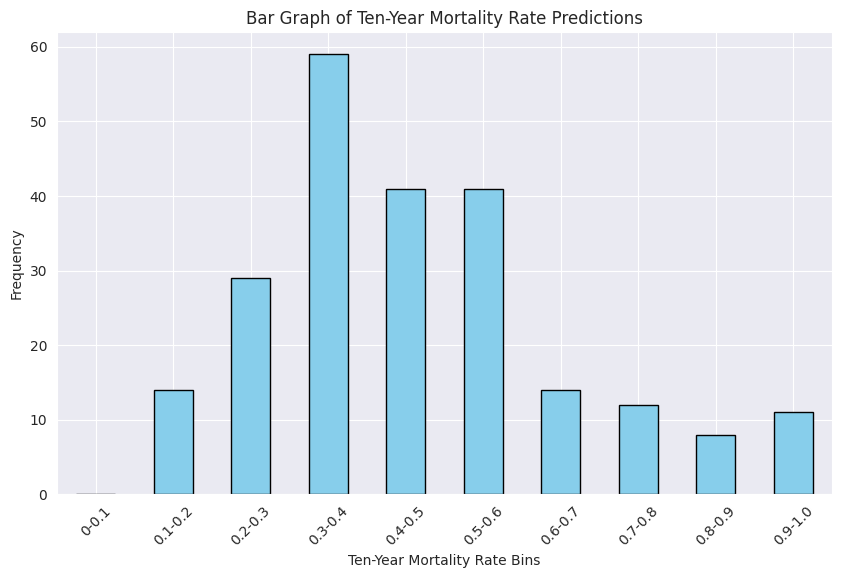

In [ ]:
# Create bins for the ten-year mortality rate
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5',
          '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']

# Add a 'Mortality Rate Bin' column
predict_mortality_rate['Mortality Rate Bin'] = pd.cut(predict_mortality_rate['tenyears_mortality_rate'], bins=bins, labels=labels)

# Count the frequencies for each bin
bin_counts = predict_mortality_rate['Mortality Rate Bin'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Ten-Year Mortality Rate Bins')
plt.ylabel('Frequency')
plt.title('Bar Graph of Ten-Year Mortality Rate Predictions')
plt.xticks(rotation=45)
plt.show()
